In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# def makeLMfilters():
#     sup     = 49
#     scalex  = np.sqrt(2) * np.array([1,2,3])
#     norient = 6
#     nrotinv = 12

#     nbar  = len(scalex)*norient
#     nedge = len(scalex)*norient
#     nf    = nbar+nedge+nrotinv
#     F     = np.zeros([sup,sup,nf])
#     hsup  = (sup - 1)/2

#     x = [np.arange(-hsup,hsup+1)]
#     y = [np.arange(-hsup,hsup+1)]

#     [x,y] = np.meshgrid(x,y)

#     orgpts = [x.flatten(), y.flatten()]
#     orgpts = np.array(orgpts)
    
#     count = 0
#     for scale in range(len(scalex)):
#         for orient in range(norient):
#             angle = (np.pi * orient)/norient
#             c = np.cos(angle)
#             s = np.sin(angle)
#             rotpts = [[c+0,-s+0],[s+0,c+0]]
#             rotpts = np.array(rotpts)
#             rotpts = np.dot(rotpts,orgpts)
#             F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
#             F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
#             count = count + 1
            
#     count = nbar+nedge
#     scales = np.sqrt(2) * np.array([1,2,3,4])
    
#     for i in range(len(scales)):
#         F[:,:,count]   = gaussian2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, scales[i])
#         count = count + 1
        
#     for i in range(len(scales)):
#         F[:,:,count] = log2d(sup, 3*scales[i])
#         count = count + 1
        
#     return F


# F = makeLMfilters()
# print(F.shape) #same as print(np.shape(F))
# FB_responses = makeResponses(img, F)
# print(FB_responses.shape, img.shape)
# card2g = compute_l1_norm_responsesG(FB_responses)


In [2]:
# import cv2
# import os
# import numpy as np

# def compute_l1_norm_responsesG(responses):
#     w, h, ch, num_filters = responses.shape
#     l1_norm_responses = np.empty([num_filters + 1])

#     for i in range(num_filters):
#         response = responses[:, :, :, i]
#         l1_norm_response = np.sum(np.abs(response))
#         l1_norm_response /= (w * h * ch)
#         l1_norm_responses[i] = l1_norm_response

#     l1_norm_responses[num_filters] = np.sum(l1_norm_responses[:-1])
#     return l1_norm_responses

# def makeResponses(img):
#     # Example operation: Simple blurring with different kernel sizes
#     num_filters = 48
#     if len(img.shape) == 3:
#         w, h, ch = img.shape
#     else:
#         w, h = img.shape
#         ch = 1

#     responses = np.empty([w, h, ch, num_filters])
#     for i in range(num_filters):
#         kernel_size = (i % 5) + 1
#         filter_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

#         if ch > 1:
#             for c in range(ch):
#                 responses[:, :, c, i] = cv2.filter2D(img[:, :, c], -1, filter_kernel)
#         else:
#             responses[:, :, :, i] = cv2.filter2D(img, -1, filter_kernel)

#     return responses

# def get_all_l1_responses(image_path):
#     all_l1_responses = []
#     image_files = [os.path.join(root, file) for root, _, files in os.walk(image_path) for file in files if file.endswith('.png')]
    
#     for file in image_files:
#         image = cv2.imread(file)
#         if image is not None:
#             FB_responses = makeResponses(image)
#             l1_response = compute_l1_norm_responsesG(FB_responses)
#             all_l1_responses.append(l1_response)
    
#     return all_l1_responses

# all_l1_responses = get_all_l1_responses("C:/Caleb/College/UIC/Senior_Year/CS 415/Project_2/clean_images")


In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory_path = "clean_images"
# for filename in os.listdir(directory_path):
#     if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
#         img_path = os.path.join(directory_path, filename)
#         img = mpimg.imread(img_path)
        
#         plt.imshow(img)
#         plt.axis('off')  # Turn off axis labels
#         plt.title(filename)  # Set image title as filename
#         plt.show()


In [12]:
import os
import cv2
import numpy as np

def compute_l1_norm(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm
    l1_norm = 0
    for i in range(len(images_resized) - 1):
        l1_norm += np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
    
    return l1_norm


# Compute L1 norm
result = compute_l1_norm(directory_path)
print("L1 norm of the images:", result)


L1 norm of the images: 20347554992.0


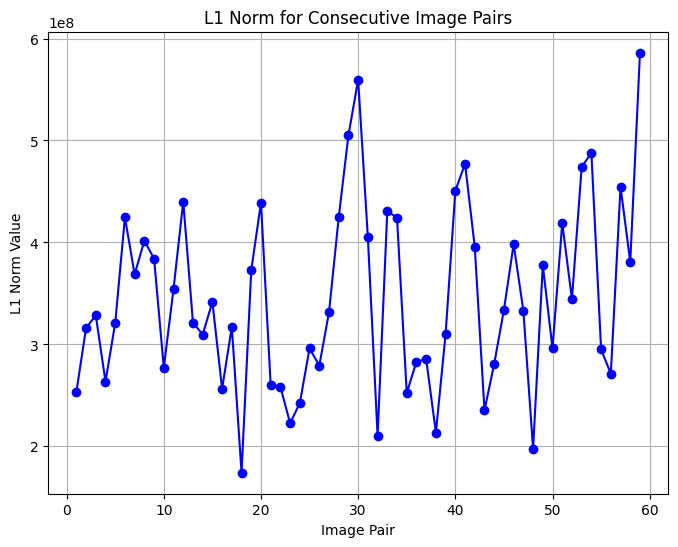

In [13]:
def compute_l1_norm_per_image(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm for each pair of consecutive images
    l1_norm_values = []
    for i in range(len(images_resized) - 1):
        l1_norm = np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values


# Compute L1 norm for each image pair
l1_norm_values = compute_l1_norm_per_image(directory_path)

# Plotting L1 norm values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(l1_norm_values) + 1), l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive Image Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()

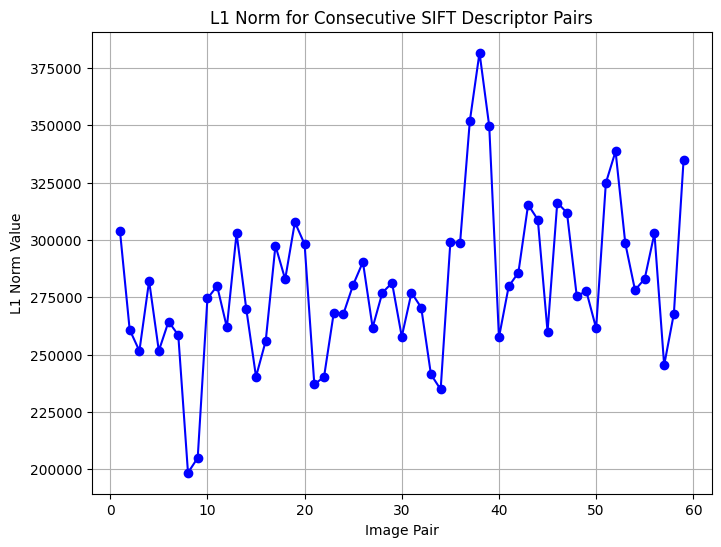

In [15]:
def compute_sift_l1_norm(directory_path, num_descriptors=100):
    sift = cv2.SIFT_create()
    images = []
    sift_descriptors = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
            kp, des = sift.detectAndCompute(img, None)
            # Normalize the number of descriptors
            if des is not None:
                des = des[:num_descriptors]
                sift_descriptors.append(des)
    
    # Calculate L1 norm for each pair of consecutive SIFT descriptors
    l1_norm_values = []
    for i in range(len(sift_descriptors) - 1):
        l1_norm = np.sum(np.abs(sift_descriptors[i].astype(np.float32) - sift_descriptors[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values

# Directory containing the images

# Compute L1 norm for SIFT descriptors of each image pair
sift_l1_norm_values = compute_sift_l1_norm(directory_path)

# Plotting L1 norm values of SIFT descriptors
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sift_l1_norm_values) + 1), sift_l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive SIFT Descriptor Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()
